In [4]:
import pandas as pd           
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns         
import plotly.express as px 

In [5]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
# Load data
df_panel = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='WBL Panel 2024')
df_mobility = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Mobility')
df_workplace = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Workplace')
df_pay = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Pay')
df_marriage = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Marriage')
df_parenthood = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Parenthood')
df_assets = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Assets')
df_pension = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Pension')

df_laws_legal_2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='Legal2.0')
df_sfw_legal_2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='SF2.0')
df_sfw_economy2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='EO_ByEconomy')

df_crosssection = pd.read_csv('Data/cross_section_data_encoded.csv')


In [11]:
region = "Sub-Saharan Africa"

In [32]:
df_panel = df_panel[df_panel["Region"]== "Sub-Saharan Africa"]
df_mobility = df_mobility[df_mobility["Region"]== "Sub-Saharan Africa"]
df_workplace = df_workplace[df_workplace["Region"]== "Sub-Saharan Africa"]
df_pay = df_pay[df_pay["Region"]== "Sub-Saharan Africa"]
df_marriage = df_marriage[df_marriage["Region"]== "Sub-Saharan Africa"]
df_parenthood = df_parenthood[df_parenthood["Region"]== "Sub-Saharan Africa"]
df_assets = df_assets[df_assets["Region"]== "Sub-Saharan Africa"]
df_pension = df_pension[df_pension["Region"]== "Sub-Saharan Africa"]
df_laws_legal_2024 = df_laws_legal_2024[df_laws_legal_2024["Region"]== "Sub-Saharan Africa"]

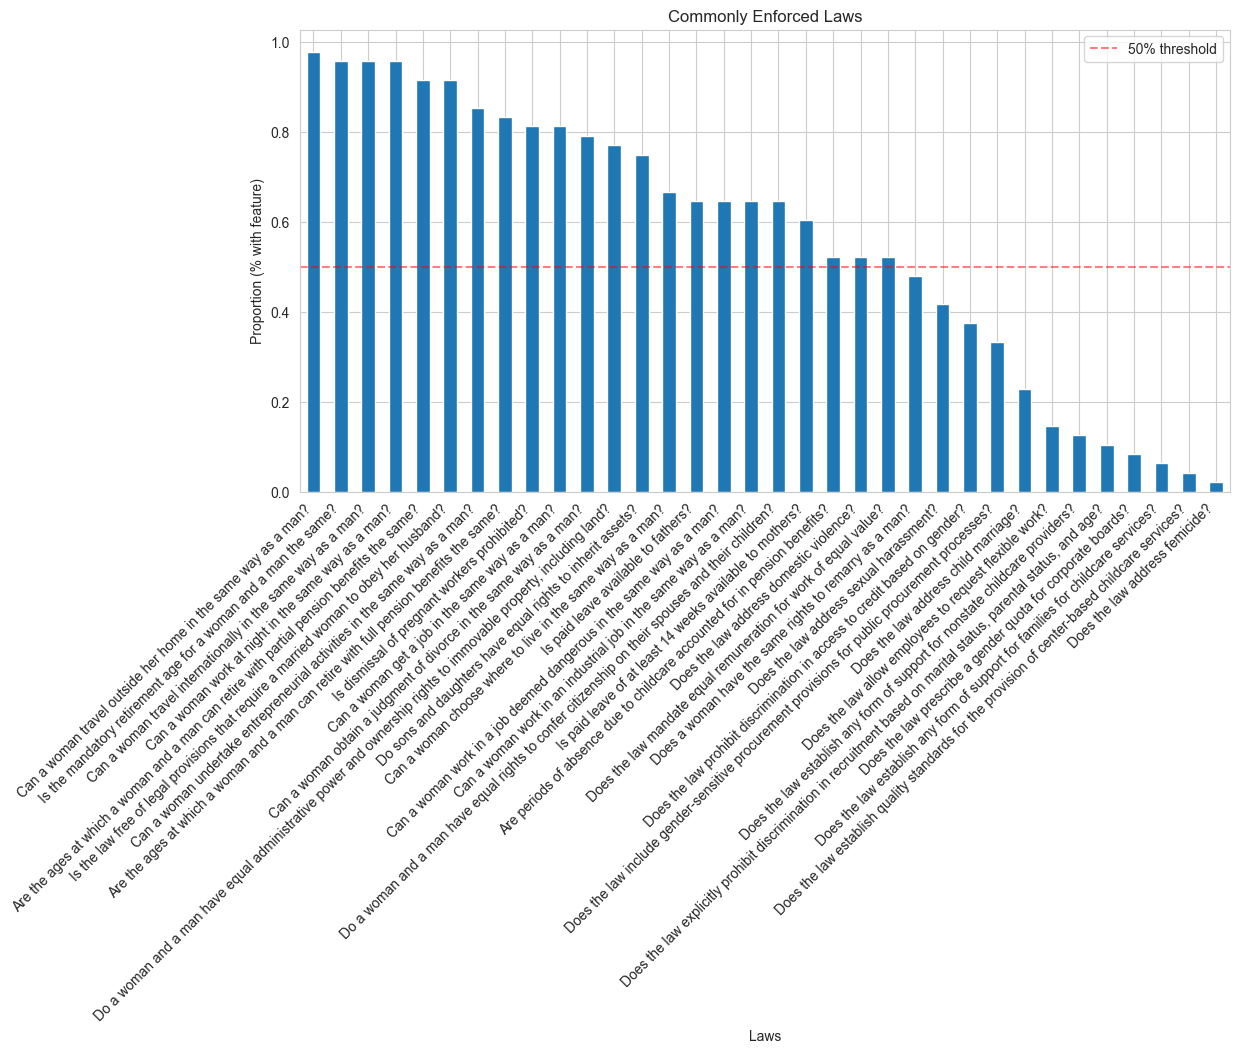

In [14]:
#df_crosssection.columns

non_binary_cols = ['Economy', 'OVERALL']
binary_cols = [col for col in df_crosssection.columns if col not in non_binary_cols]

plt.figure(figsize=(12, 6))
means = df_crosssection[binary_cols].mean().sort_values(ascending=False)
means.plot(kind='bar')
plt.xlabel('Laws')
plt.ylabel('Proportion (% with feature)')
plt.title('Commonly Enforced Laws')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
plt.show()


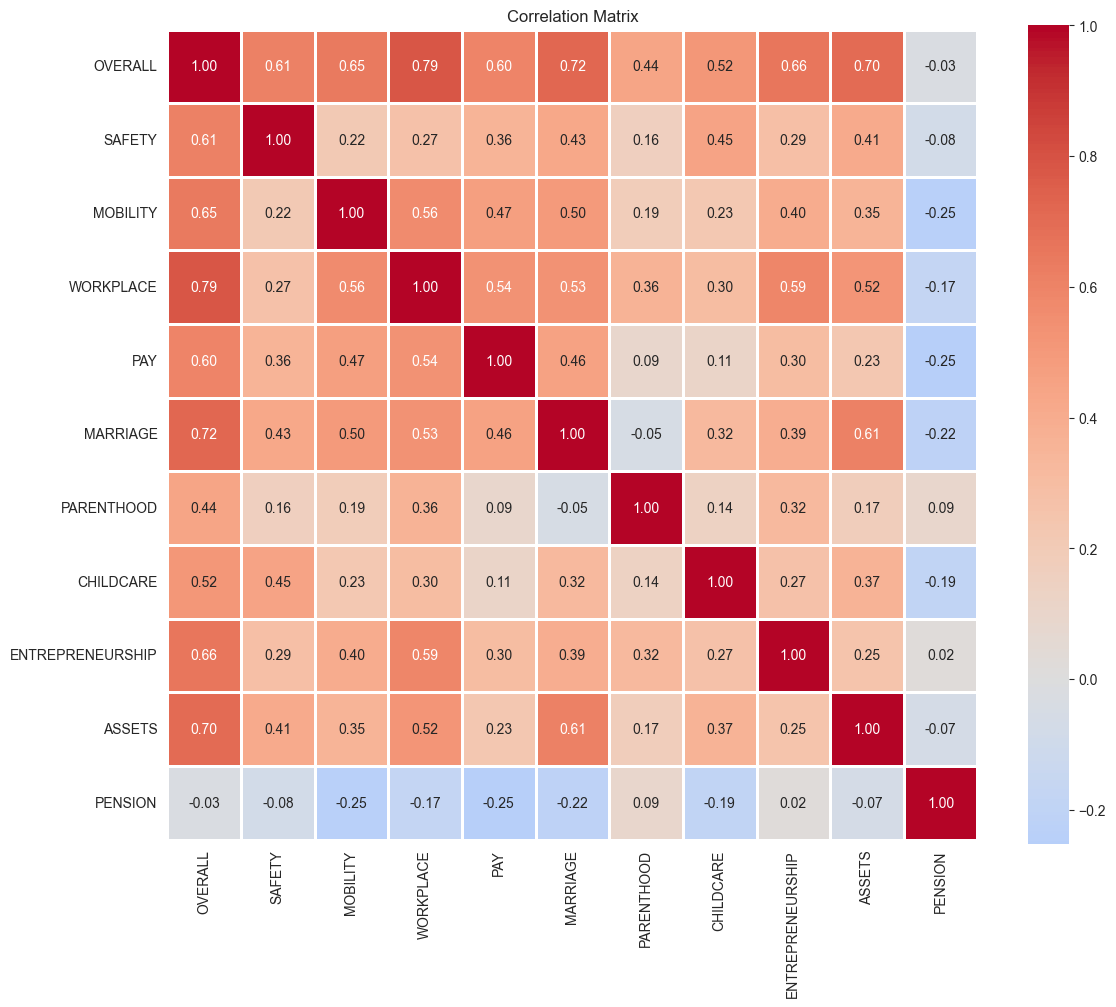

In [15]:
# Correlation Matrix for Women, Business and the Law 2.0 Data for 20244
numeric_cols = df_laws_legal_2024.select_dtypes(include=[np.number]).columns
correlation = df_laws_legal_2024[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Notes: 

In [16]:
df_panel.head(5)

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,...,Do women and men have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,PENSION,Is the age at which women and men can retire with full pension benefits the same?,Is the age at which women and men can retire with partial pension benefits the same?,Is the mandatory retirement age for women and men the same?,Are periods of absence due to childcare accounted for in pension benefits?
162,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,No,Yes,Yes,Yes,Yes,25,No,No,Yes,No
163,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1972,30.625,75,No,Yes,...,No,Yes,Yes,Yes,Yes,25,No,No,Yes,No
164,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1973,30.625,75,No,Yes,...,No,Yes,Yes,Yes,Yes,25,No,No,Yes,No
165,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1974,30.625,75,No,Yes,...,No,Yes,Yes,Yes,Yes,25,No,No,Yes,No
166,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1975,30.625,75,No,Yes,...,No,Yes,Yes,Yes,Yes,25,No,No,Yes,No


In [19]:
result = pd.merge(df_panel, df_mobility, on='Economy Code', how='inner')

In [29]:
result.head()

,Economy_x,Economy Code,ISO Code_x,Region_x,Income Group_x,Report Year_x,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?_x,Can a woman travel outside her home in the same way as a man?_x,...,Legal Basis,Can a woman travel outside her home in the same way as a man?_y,Score.1,Legal Basis.1,Can a woman apply for a passport in the same way as a man?_y,Score.2,Legal Basis.2,Can a woman travel outside the country in the same way as a man?_y,Score.3,Legal Basis.3
0,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,"Decreto-Law No.47344 of 1966 (Civil Code), Art...",Yes,1,No restrictions could be located,Yes,1,No restrictions could be located,Yes,1,No restrictions could be located
1,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,"Civil Code, 1672",Yes,1,No restrictions could be located,Yes,1,No restrictions could be located,Yes,1,No restrictions could be located
2,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,"Civil Code, 1672",Yes,1,No restrictions could be located,Yes,1,No restrictions could be located,Yes,1,No restrictions could be located
3,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,"Civil Code, 1672",Yes,1,No restrictions could be located,Yes,1,No restrictions could be located,Yes,1,No restrictions could be located
4,Angola,AGO,AGO,Sub-Saharan Africa,Lower middle income,1971,30.625,75,No,Yes,...,"Civil Code, 1672",Yes,1,No restrictions could be located,Yes,1,No restrictions could be located,Yes,1,No restrictions could be located


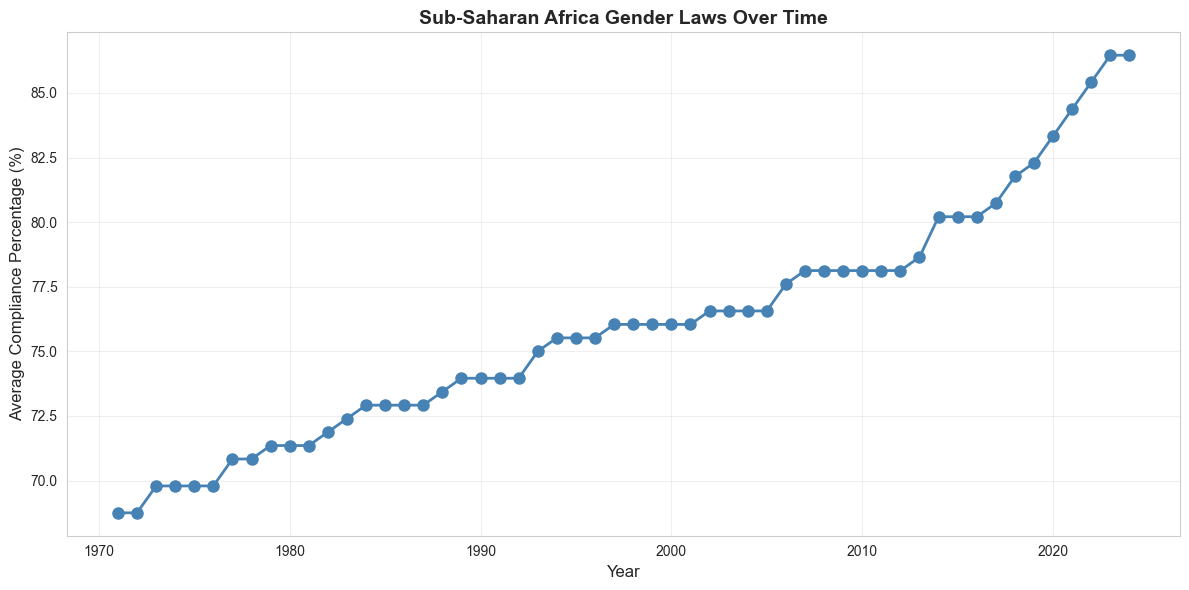

In [33]:
question_cols = [col for col in result.columns if '?' in col and col.endswith('_x')]
result['num_yes_answers'] = result[question_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Calculate compliance percentage
total_questions = len(question_cols)
result['Increase of Laws'] = (result['num_yes_answers'] / total_questions) * 100

plt.figure(figsize=(12, 6))
yearly_avg = result.groupby('Report Year_x')['compliance_percentage'].mean()
yearly_avg.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Compliance Percentage (%)', fontsize=12)
plt.title('Sub-Saharan Africa Gender Laws Over Time', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()